# Prediction using Time-Series Regression

Using the given stock market data of companies from the S&P 500, we will predict the forecast a continuation of stock market data for the next 5 years. 

### 1. Import data from CSV files

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

%matplotlib inline

In [2]:
# Import CSV files
glob.glob(r'G:\Dev Portfolio\Data Analysis\Time Series Analysis on S&P 500 Stock Market Data\individual_stocks_5yr')


['G:\\Dev Portfolio\\Data Analysis\\Time Series Analysis on S&P 500 Stock Market Data\\individual_stocks_5yr']

In [3]:
# get the current working directory
cwd = os.getcwd()

# define the path to the csv file
csv_path = os.path.join(cwd, 'individual_stocks_5yr', 'AAPL_data.csv')

# read the csv file into a pandas dataframe
df = pd.read_csv(csv_path)
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
1254   2018-02-01
1255   2018-02-02
1256   2018-02-05
1257   2018-02-06
1258   2018-02-07
Name: date, Length: 1259, dtype: datetime64[ns]

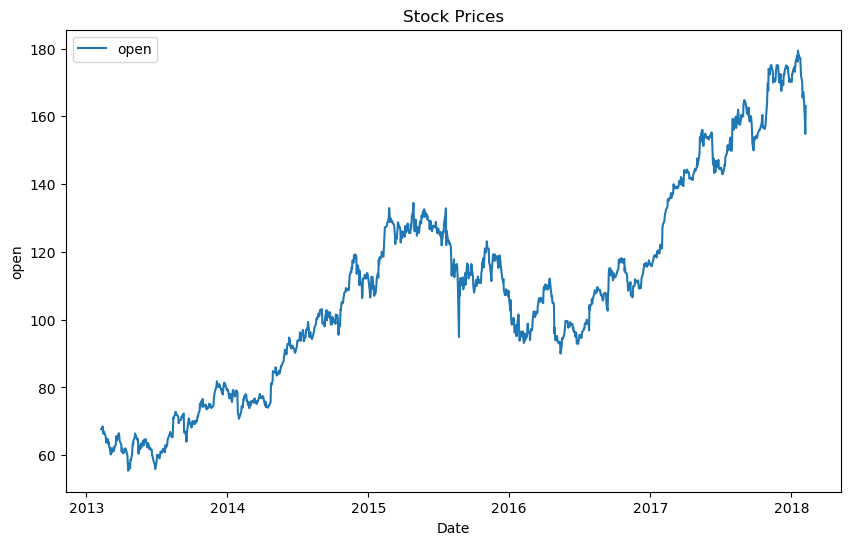

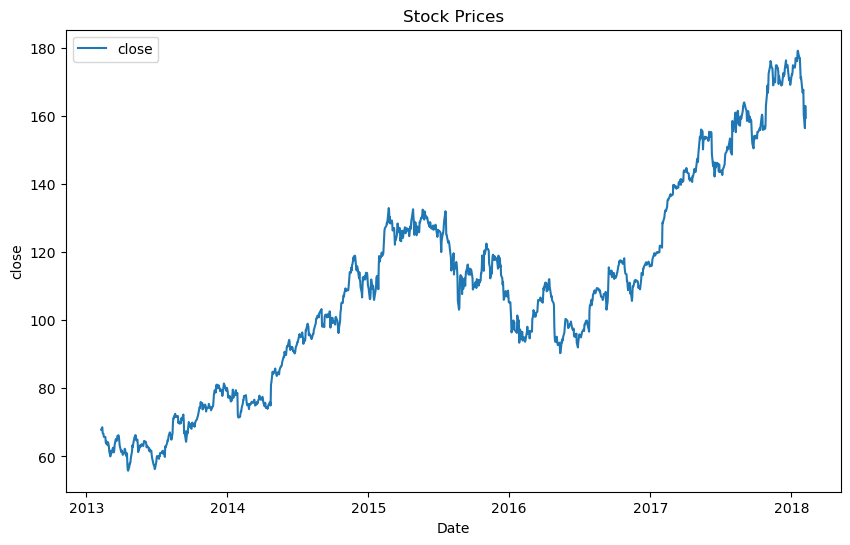

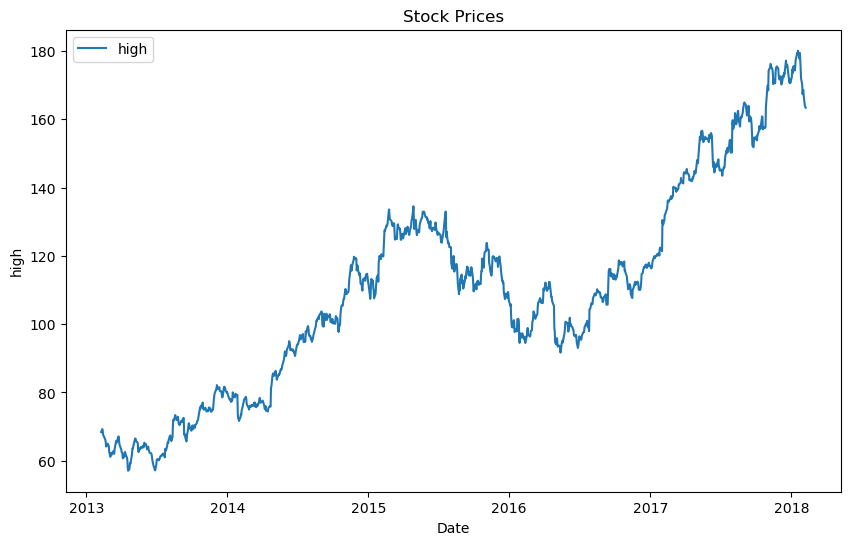

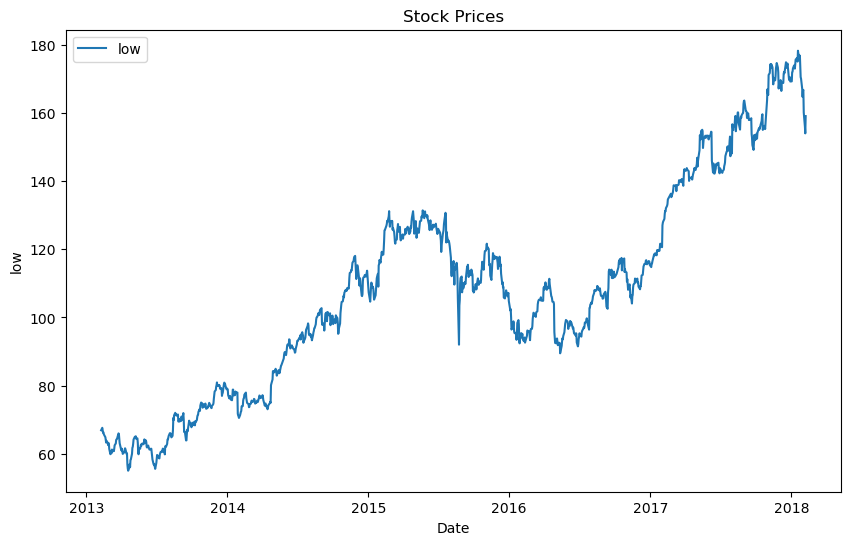

In [5]:
vars = ['open', 'close', 'high', 'low']

def LinePlot(df, vars, title):
    for column in vars:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df[column], label=column)
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.show()
LinePlot(df, vars, 'Stock Prices')

### 2. Clean Data (if needed)

In [6]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [7]:
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

### 3. Get Moving Average

Text(0.5, 1.0, 'AAPL')

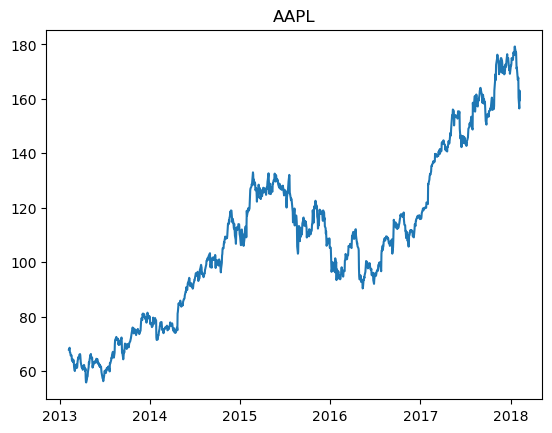

In [8]:
# plotting "date" vs "close"
plt.plot(df['date'], df['close'])
plt.title('AAPL')

In [9]:
df['close'].rolling(window=50).mean().tail(50)

1209    162.4436
1210    162.7316
1211    162.9466
1212    163.2622
1213    163.6154
1214    163.9736
1215    164.3554
1216    164.6728
1217    164.9746
1218    165.2964
1219    165.6674
1220    166.0252
1221    166.3810
1222    166.7558
1223    167.1274
1224    167.5498
1225    167.9238
1226    168.2928
1227    168.6620
1228    169.0422
1229    169.3138
1230    169.5282
1231    169.7404
1232    169.9298
1233    170.2554
1234    170.5750
1235    170.9122
1236    171.2702
1237    171.6290
1238    171.9674
1239    172.1922
1240    172.3634
1241    172.5244
1242    172.7104
1243    172.9302
1244    173.0654
1245    173.1496
1246    173.1934
1247    173.2094
1248    173.1762
1249    173.1050
1250    173.0558
1251    172.9882
1252    172.9460
1253    172.8726
1254    172.8252
1255    172.6356
1256    172.3026
1257    172.0640
1258    171.7554
Name: close, dtype: float64

In [10]:
aapl_50 = df.copy()
print(aapl_50)

           date      open      high       low     close     volume  Name
0    2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1    2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2    2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3    2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4    2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...         ...       ...       ...       ...       ...        ...   ...
1254 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]


In [11]:
aapl_50['close' + '_50'] = aapl_50['close'].rolling(window=50).mean()
aapl_50.tail(10)

,date,open,high,low,close,volume,Name,close_50
1249,2018-01-25,174.505,174.9500,170.5300,171.11,41529004,AAPL,173.1050
1250,2018-01-26,172.000,172.0000,170.0600,171.51,39143011,AAPL,173.0558
1251,2018-01-29,170.160,170.1600,167.0700,167.96,50640406,AAPL,172.9882
1252,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,172.9460
1253,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,172.8726
1254,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,172.8252
1255,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,172.6356
1256,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,172.3026
1257,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,172.0640
1258,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,171.7554


In [12]:
aapl_50.set_index('date' , inplace=True)
aapl_50

,open,high,low,close,volume,Name,close_50
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN
...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,172.8252
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,172.6356
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,172.3026


### Time-Series Regression

Text(0.5, 1.0, 'AAPL')

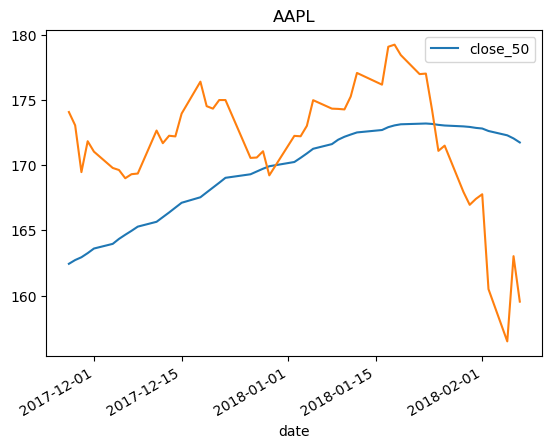

In [13]:
# Plot the moving average
filter1 = aapl_50['Name']=='AAPL'
df = aapl_50[filter1]
df[['close_50']].tail(50).plot(ax=plt.gca())
plt.plot(df['close'].tail(50))
plt.title('AAPL')

In [14]:
aapl_50 = aapl_50.dropna()
aapl_50.isnull().sum()

open        0
high        0
low         0
close       0
volume      0
Name        0
close_50    0
dtype: int64

In [15]:
print(aapl_50)

                open      high       low     close     volume  Name  \
date                                                                  
2013-04-22   56.0914   57.4571   55.8964   56.9528  107338322  AAPL   
2013-04-23   57.7128   58.3401   56.9728   58.0185  160760747  AAPL   
2013-04-24   56.2199   59.3214   56.0714   57.9231  242387530  AAPL   
2013-04-25   58.7464   59.1342   58.1428   58.3399   95984896  AAPL   
2013-04-26   58.5442   59.8241   58.3214   59.6007  191006032  AAPL   
...              ...       ...       ...       ...        ...   ...   
2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

              close_50  
date                    
2013-04-22   62.747386  
2

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing

# Fit Exponential Smoothing model
model = ExponentialSmoothing(aapl_50['close_50'], trend='add', seasonal='add', seasonal_periods=30)
predicted_result = model.fit()

c:\Users\Gianello Montenegro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
# Forecast future closing prices
forecast_days = 50  # Change this as needed
forecast = predicted_result.forecast(steps=forecast_days)

# Set the date range for the forecast
start_date = aapl_50.index[-1] + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=forecast_days-1)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a new dataframe for the forecast
forecast_df = pd.DataFrame({'date': forecast_dates, 'close': forecast.values})
forecast_df.set_index('date', inplace=True)
print(forecast_df)

                 close
date                  
2018-02-08  171.435074
2018-02-09  171.105808
2018-02-10  170.777222
2018-02-11  170.444060
2018-02-12  170.117374
2018-02-13  169.790193
2018-02-14  169.465849
2018-02-15  169.137747
2018-02-16  168.811202
2018-02-17  168.483414
2018-02-18  168.155450
2018-02-19  167.825680
2018-02-20  167.487247
2018-02-21  167.160201
2018-02-22  166.825517
2018-02-23  166.485527
2018-02-24  166.139012
2018-02-25  165.792798
2018-02-26  165.447456
2018-02-27  165.103822
2018-02-28  164.767929
2018-03-01  164.442276
2018-03-02  164.122074
2018-03-03  163.796740
2018-03-04  163.477390
2018-03-05  163.166515
2018-03-06  162.854820
2018-03-07  162.545509
2018-03-08  162.239866
2018-03-09  161.931266
2018-03-10  161.610940
2018-03-11  161.281674
2018-03-12  160.953088
2018-03-13  160.619926
2018-03-14  160.293240
2018-03-15  159.966059
2018-03-16  159.641715
2018-03-17  159.313613
2018-03-18  158.987068
2018-03-19  158.659280
2018-03-20  158.331316
2018-03-21 

c:\Users\Gianello Montenegro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Gianello Montenegro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


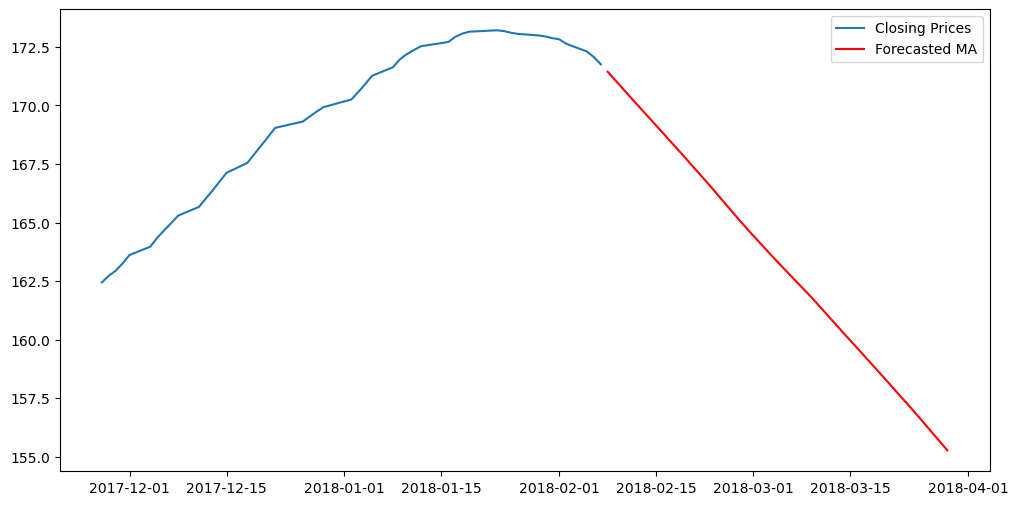

In [18]:
# Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(aapl_50['close_50'].tail(50), label='Closing Prices')
plt.plot(forecast_df, label='Forecasted MA', color='red')
plt.legend()
plt.show()